<br/>

# Projektaufgabe: Deskriptive Statistik und Visualisierungen
***


## Aufgabe

Für den Online-Artikel zum Kundenstamm der Bibliothek braucht die Pressestelle einige interessanten Zahlen zum Thema Alter und Bibliotheksnutzung. Außerdem möchte sie die Daten in einer Info-Graphik zusammenstellen.

Für eine erste Demo bist Du verantwortlich:
- Berechne 2-3 Statistiken und erstelle 2-3 Visualisierungen basierend auf den Informationen im Datensatz.
- Nutze pandas zur Berechnung der Statistiken und seaborn für die Visualisierungen.

Lade bis spätestens 25.03.22 Deinen Report in Form eines Jupyter Notebooks in der Dateiablage in Moodle hoch.
<br/><br/><br/><br/>


In [134]:
import pandas as pd 
pd.set_option('display.max_rows', 1500)
df = pd.read_csv("/home/schumahe/Schumacher/Modul_3/data/Library_Usage.csv")

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [136]:
df.head(100)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0
5,3,SENIOR,0,0,65 to 74 years,C2,Chinatown,None,None,z,email,True,2015,True,NaN
6,0,ADULT,3002,1689,25 to 34 years,P5,Portola,July,2016,p,phone,True,2004,False,9.0
7,0,ADULT,4,0,25 to 34 years,C2,Chinatown,July,2014,p,phone,True,2014,False,5.0
8,0,ADULT,20,0,25 to 34 years,S7,Sunset,June,2015,z,email,True,2011,False,7.0
9,0,ADULT,3,1,60 to 64 years,A5,Anza,June,2016,z,email,True,2013,False,NaN


<br/><br/>
## 1. Wieviele Nutzer haben "Chinatown" oder "Sunset" als ihre Home Library Definition und welche Altersstruktur haben sie?

<br/><br/>
Im folgenden möchte ich den Grunddatensatz nutzen, um zwei Teilbibliotheken, "Chinatown" und "Sunset", in den Fokus der Beobachtungen zu stellen.

Um zunächst einen Überblick der gewünschten Werte zu erhalten, ist es nützlich, die Werte der Teilbibliotheken "Chinatown" und "Sunset" auszählen zu lassen. Dies kann durch deren Extraktion in einem eigenen Dataframe erfolgen. Dies ist auch für den folgenden Visualisierungsschritt von Nöten, um einen Zusammenhang zu der Altersstruktur und deren Variable "Age Range" der Nutzer\*innen der beiden Teilbibliotheken zu erhalten.
<br/><br/>

In [193]:
china_sun = df[(df["Home Library Definition"] == "Chinatown") | 
               (df["Home Library Definition"] == "Sunset")]

In [138]:
china_sun["Home Library Definition"].value_counts()

Chinatown    17140
Sunset       15020
Name: Home Library Definition, dtype: int64

> __Es ergeben sich für die beide Teilbibliotheken folgende Nutzer\*innenzahlen:__ 
> - 17140 = Chinatown
> - 15020 = Sunset



Die Herstellung eines zahlenmäßigen sowie visuellen Zusammenhangs zur Altersstruktur dieser Nutzer\*innen kann im nächsten Schritt durch eine Kreuztabelle, die die absoluten Zahlen vergleichbar macht, und einem Balkendiagramm erfolgen:  


In [139]:
pd.crosstab(
    china_sun["Home Library Definition"],
    china_sun["Age Range"],
    margins=True)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,All
Home Library Definition,,,,,,,,,,,
Chinatown,1369,3132,1249,2610,2141,1992,895,1010,1669,1068,17135
Sunset,1266,1872,877,3513,2451,1774,719,710,1241,595,15018
All,2635,5004,2126,6123,4592,3766,1614,1720,2910,1663,32153


<br/>

### __Visualisierung__
<br/>

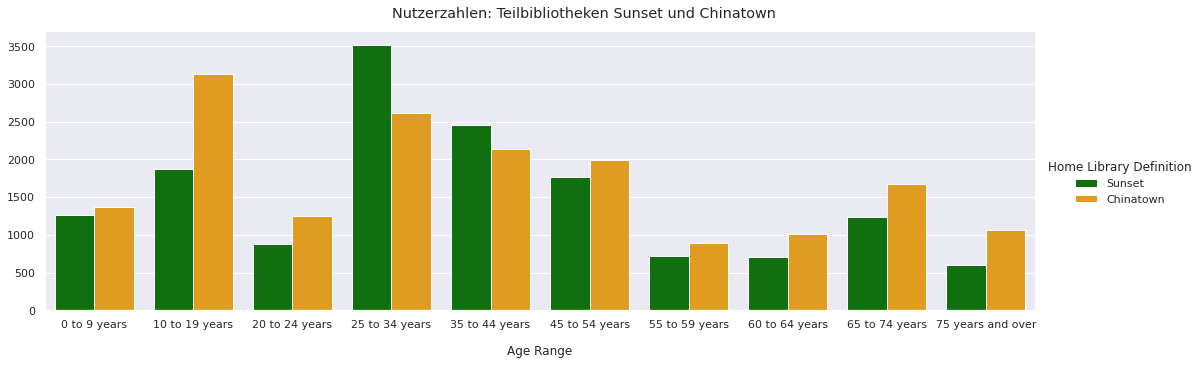

In [140]:
china_sun_visual = sns.catplot(x="Age Range", 
     data=china_sun, kind='count', hue="Home Library Definition", height=5, aspect=3, 
     palette=sns.color_palette(['green', 'orange']), 
     order=["0 to 9 years","10 to 19 years","20 to 24 years","25 to 34 years","35 to 44 years","45 to 54 years","55 to 59 years","60 to 64 years","65 to 74 years","75 years and over"])
china_sun_visual.fig.subplots_adjust(top=0.91)
china_sun_visual.fig.suptitle('Nutzerzahlen: Teilbibliotheken Sunset und Chinatown')
plt.xlabel("Age Range", labelpad=15)
plt.ylabel("", labelpad=15)
china_sun_visual
plt.show()

Die Altersstruktur der Nutzer gestaltet sich bis auf die Segmente "10 to 19" und "25 to 34" relativ ausgeglichen. Im Segment "10 to 19" gibt es eine deutliche Mehrheit in Chinatown, beim Segment "25 to 34 für Sunset. Um weitere Schlüsse ziehen zu können, wäre ein Abgleich z.B. mit einer Einwohnerstatistik hilfreich. Jedoch ist zur Vermittlung auch die Ausgabe von Mittelwerten für jede Altersgruppe wertvoll, was wiederum durch die Kreuztabelle erfolgen kann, indem die Spalten prozentual "normalisiert" werden.
<br/>

<br/>

### __Prozentuale Aussagen über die Anzahl der Nutzer\*innen pro Altersgruppe__

In der folgenden spaltenbasierten Listung werden nur prozentuale Verhältnisse innerhalb der Spalten erzeugt. Man kann vergleichende Schlüsse der Zahlen innerhalb von einer Spalte geben, also die Teilbibliothek "Chinatown" nutzen 64,2% der "75 years and over" aus der Gesamtanzahl der Nutzer*innen (also "Chinatown" und "Sunset") für diese Altersgruppe.

In [141]:
pd.crosstab(
    china_sun["Home Library Definition"],
    china_sun["Age Range"],
    margins=True, normalize=1) * 100 # Multiplikation mit 100 zum Erhalt "echter" Prozentzahlen

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,All
Home Library Definition,,,,,,,,,,,
Chinatown,51.954459,62.589928,58.748824,42.626164,46.624564,52.894318,55.452292,58.72093,57.353952,64.221287,53.292072
Sunset,48.045541,37.410072,41.251176,57.373836,53.375436,47.105682,44.547708,41.27907,42.646048,35.778713,46.707928


Mit dem zeilenbasierten Zusammenhang können Aussagen über die Verteilung innerhalb der Gesamtmenge einer Teilbibliothek getroffen werden. Also in "Chinatown" sind 18,3% der Nutzer\*innen zwischen 10 und 19 Jahre alt, aber nur 7,3% zwischen 20 und 24 Jahren alt.


In [142]:
pd.crosstab(
    china_sun["Home Library Definition"],
    china_sun["Age Range"],
    margins=True, normalize=0) * 100 # Multiplikation mit 100 zum Erhalt "echter" Prozentzahlen

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Home Library Definition,,,,,,,,,,
Chinatown,7.989495,18.278378,7.289174,15.231981,12.494893,11.625328,5.223227,5.894368,9.740298,6.232857
Sunset,8.429884,12.465042,5.839659,23.391930,16.320416,11.812492,4.787588,4.727660,8.263417,3.961912
All,8.195192,15.563089,6.612136,19.043324,14.281716,11.712748,5.019749,5.349423,9.050477,5.172146


<br/><br/>

## 2. Wieviel Ausleihen "Total Checkouts" im Durchschnitt haben die Nutzergruppen der beiden Teilbibliotheken "Chinatown" und "Sunset" im Erhebungszeitraum?




### __Ermittlung der Gesamtausleihzahlen und durchschnittlichen Ausleihzahlen pro Nutzer\*innengruppe__

In den nächsten beiden Schritten werden in der Kreuztabelle zunächst die Gesamtausleihzahlen für die Nutzer\*innengruppen und die beiden Teilbibliotheken ermittelt, um danach die Durchschnittsausleihzahlen zu berechnen. Dies wird durch die Variable aggfunc und die zugehörige numpy-Methode np.sum bzw. np.mean erzielt.
<br/><br/>

In [143]:
china_sun_checkouts = pd.crosstab(
        china_sun["Home Library Definition"],
        china_sun["Age Range"],
        values=china_sun["Total Checkouts"], 
        aggfunc=np.sum, 
        margins=True).round(0)
china_sun_checkouts

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,All
Home Library Definition,,,,,,,,,,,
Chinatown,246107,1482346,434103,354173,478082,697229,312411,431429,712693,596577,5745150
Sunset,227340,657431,159713,238286,386988,504389,218608,273134,490348,235790,3392027
All,473447,2139777,593816,592459,865070,1201618,531019,704563,1203041,832367,9137177


<br/>

In [144]:
china_sun_checkouts = pd.crosstab(
        china_sun["Home Library Definition"],
        china_sun["Age Range"],
        values=china_sun["Total Checkouts"], 
        aggfunc=np.mean, 
        margins=True).round(0)
china_sun_checkouts

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,All
Home Library Definition,,,,,,,,,,,
Chinatown,180.0,473.0,348.0,136.0,223.0,350.0,349.0,427.0,427.0,559.0,335.0
Sunset,180.0,351.0,182.0,68.0,158.0,284.0,304.0,385.0,395.0,396.0,226.0
All,180.0,428.0,279.0,97.0,188.0,319.0,329.0,410.0,413.0,501.0,284.0


> __Die Tabelle zeigt die durchschnittlichen Ausleihzahlen per Alterssegment in den beiden Teilibliotheken "Chinatown" und "Sunset".__

Kontrollrechnung: der Wert, der in der Zelle Spalte/Zeile "All" steht, ist die durchschnittlichen Ausleihzahlen aller Nutzer\*innen der Teilbibliotheken und ergibt sich durch die Division der Gesamtausleihen und der Gesamtanzahl der Nutzer\*innen. Die leichten Abweichungen, die sich in der Kreuztabelle zu den durchschnittlichen Ausleihzahlen ergeben, wenn man die absoluten Zahlen einer Spalte im Kopf nachprüft, entstehen durch die Auf- und Abrundungen der vierzehnstelligen (!) Zahlen hinter dem Komma. Zu prüfen wäre, ob man für die Berechnungen in solchen Fällen die Anzahl der Stellen hinter dem Komma reduzieren könnte.

In [145]:
total_checkouts = china_sun["Total Checkouts"].sum()
total_patrons = china_sun["Age Range"].value_counts().sum()
total_checkouts / total_patrons

284.18079183901966

<br/>

### __Visualisierung__

Die Visualisierung mit der seaborn-Methode .heatmap setzt die Unterschiede in einen farblichen Zusammenhang, je dunkler desto höher die Durchschnittsausleihen pro Altersgruppe. Dadurch wird deutlich, dass die jungen bis mittelalten Altersgruppen "25 to 34" und "35 to 44" am wenigsten in beiden Teilbibliotheken ausleihen. Liegt es an der Lebensphase, in der traditionell Familiengründung und Kindererziehung im Vordergrund stehen?
<br/>

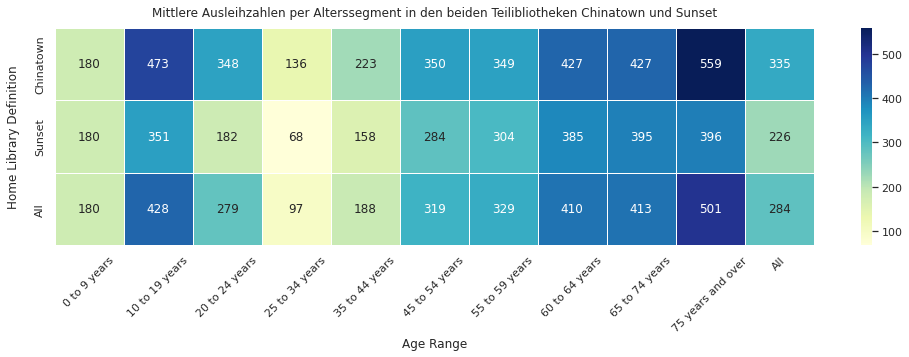

In [146]:
fig, ax = plt.subplots(figsize=(17,4))
sns.heatmap(china_sun_checkouts, cmap='YlGnBu', annot=True, fmt='g', linewidths=.9)
#plt.xticks(rotation=70)
plt.ylabel("Home Library Definition", labelpad=15, size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Mittlere Ausleihzahlen per Alterssegment in den beiden Teilibliotheken Chinatown und Sunset', size=12, y=1.025)
plt.show()

<br/>

### __Prozentuale Aussagen über die durchschnittlichen Ausleihzahlen pro Altersgruppe für jede Teilbibliothek__

Eine Aussage über den prozentualen Anteil der durchschnittlichen Ausleihen zwischen den beiden Altersgruppen bietet erneut die Kreuztabelle mit Spalten- oder Zeilennormalisierung. Jedoch lassen sich die Verhältnisse hierbei nur innerhalb der jeweiligen Spalte bzw. Zeile herstellen, während die Tabelle mit den absoluten durchschnittlichen Zahlen auch zwischen den Gruppen Aussagekraft hat. Hier gilt also nur: bspw. 65,6% aller Ausleihen im Alterssegment "20 to 24 years" werden in der Teilbibliothek "Chinatown" getätigt, 34,4% in "Sunset" bzw. der höchste Ausleihdurchschnittswert in der Teilbibliothek "Chinatown" liegt in der Altersgruppe der 75 years and over" mit 16,1% (s.u.).

In [147]:
china_sun_checkouts_percentage = pd.crosstab(
        china_sun["Home Library Definition"],
        china_sun["Age Range"],
        values=china_sun["Total Checkouts"], 
        aggfunc=np.mean, 
        margins=True, normalize=1)
china_sun_checkouts_percentage * 100

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,All
Home Library Definition,,,,,,,,,,,
Chinatown,50.027537,57.404572,65.617887,66.67304,58.579568,55.177965,53.446454,52.615106,51.939733,58.49883,59.749891
Sunset,49.972463,42.595428,34.382113,33.32696,41.420432,44.822035,46.553546,47.384894,48.060267,41.50117,40.250109


<br/>

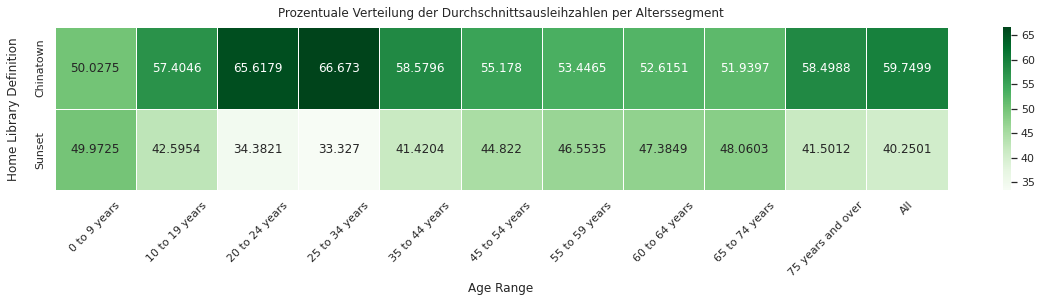

In [148]:
fig, ax = plt.subplots(figsize=(20,3))
sns.heatmap(china_sun_checkouts_percentage * 100, cmap='Greens', annot=True, fmt='g', linewidths=.9)
plt.ylabel("Home Library Definition", labelpad=15, size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Prozentuale Verteilung der Durchschnittsausleihzahlen per Alterssegment', size=12, y=1.025)
plt.show()

In [149]:
china_sun_checkouts_percentage = pd.crosstab(
        china_sun["Home Library Definition"],
        china_sun["Age Range"],
        values=china_sun["Total Checkouts"], 
        aggfunc=np.mean, 
        margins=True, normalize=0)
china_sun_checkouts_percentage * 100

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Home Library Definition,,,,,,,,,,
Chinatown,5.178545,13.633743,10.011926,3.908969,6.432399,10.082620,10.055196,12.304819,12.300802,16.090981
Sunset,6.643315,12.992330,6.737261,2.509361,5.841130,10.518521,11.248118,14.231809,14.617575,14.660579
All,5.715999,13.603562,8.885668,3.078190,5.993090,10.150502,10.466656,13.031452,13.151911,15.922968


<br/>

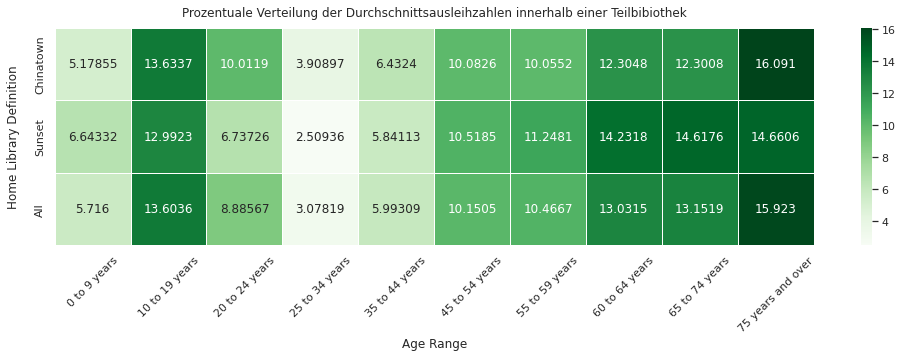

In [150]:
fig, ax = plt.subplots(figsize=(17,4))
sns.heatmap(china_sun_checkouts_percentage * 100, cmap='Greens', annot=True, fmt='g', linewidths=.9)
plt.ylabel("Home Library Definition", labelpad=15, size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Prozentuale Verteilung der Durchschnittsausleihzahlen innerhalb einer Teilbibiothek', size=12, y=1.025)
plt.show()

<br/>

## 3. Wie korrelieren die Ausleihzahlen und die Verlängerungen für jede der beiden Teilbibliotheken "Chinatown" und "Sunset" miteinander?

<br/>
Ausgangspunkt für die Beobachtungen ist der nach den beiden Teilbibliotheken einzeln gefilterte Grunddatensatz.

In [151]:
chinatown = df[(df["Home Library Definition"] == "Chinatown")]
sunset = df[(df["Home Library Definition"] == "Sunset")]

<br/>

### __Errechnung des Korrelationskoeffizienten__

In [152]:
sunset["Total Checkouts"].corr(sunset["Total Renewals"])

0.6586218968806725

In [153]:
# Oder:
sunset[["Total Checkouts", "Total Renewals"]].corr()

,Total Checkouts,Total Renewals
Total Checkouts,1.000000,0.658622
Total Renewals,0.658622,1.000000


In [154]:
chinatown["Total Checkouts"].corr(chinatown["Total Renewals"])

0.4930745203531937

### __Visualisierung__

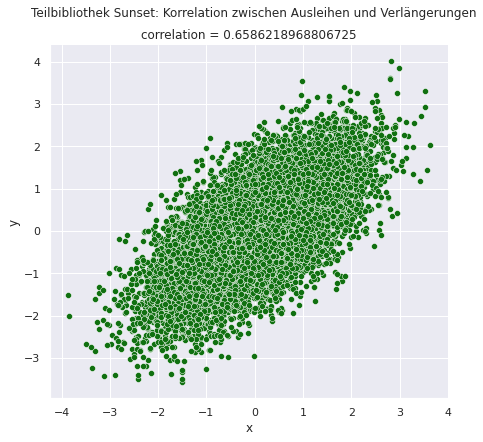

In [155]:
n = 15020 # Values der Teilbibliothek "Sunset", auf denen der Korrelationskoeffizient fußt
cor = [0.6586218968806725]
dat = pd.DataFrame()

for c in cor:
    covmat = np.array((1, c, c, 1)).reshape((2, 2))
    X = np.random.multivariate_normal([0,0], covmat, size=n)
    X = np.hstack((X, np.ones(n).reshape((n,1))*c))
    dat = dat.append(pd.DataFrame(X, columns=["x", "y", "correlation"]))
    
g = sns.FacetGrid(col="correlation", data=dat, col_wrap=3, height=6)
g.map(sns.scatterplot, "x", "y", color="#107010")
g.fig.suptitle("Teilbibliothek Sunset: Korrelation zwischen Ausleihen und Verlängerungen", size=12, x=0.2, y=1.021)
g
plt.show()

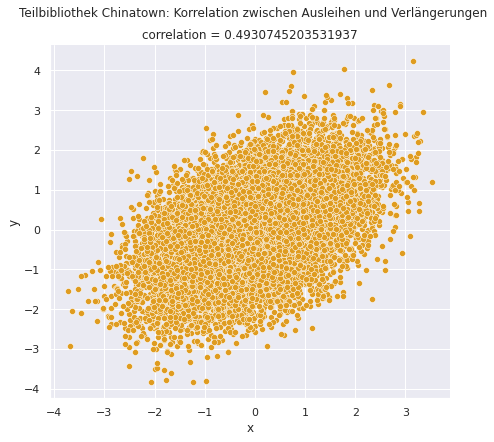

In [156]:
n = 17140 # Values der Teilbibliothek "Chinatown", auf denen der Korrelationskoeffizient fußt
cor = [0.4930745203531937]
dat = pd.DataFrame()

for c in cor:
    covmat = np.array((1, c, c, 1)).reshape((2, 2))
    X = np.random.multivariate_normal([0,0], covmat, size=n)
    X = np.hstack((X, np.ones(n).reshape((n,1))*c))
    dat = dat.append(pd.DataFrame(X, columns=["x", "y", "correlation"]))
    
g = sns.FacetGrid(col="correlation", data=dat, col_wrap=3, height=6)
g.map(sns.scatterplot, "x", "y", color="#df9c20")
g.fig.suptitle("Teilbibliothek Chinatown: Korrelation zwischen Ausleihen und Verlängerungen", size=12, x=0.2, y=1.021)
g
plt.show()

Die Grafiken deuten an, dass die durchschnittlichen Ausleihzahlen und Verlängerungen ("Total Checkouts" und "Total Renewals") in der Teilbibliothek "Sunset" mit dem Korrelationskoeffitienzen 0.6586218968806725 etwas stärker korrelieren als in "Chinatown", die einzelnen Werte gruppieren sich etwas dichter um die Diagonale.

<br/>

## 4. Wie hoch sind die durchschnittlichen Ausleihzahlen und Verlängerungen in den Altersgruppen der Variablen "Age Range" jeweils einzeln in den beiden Teilbibliotheken "Chinatown" und "Sunset"?

<br/>
Als Ausgangspunkt dient der Grunddatensatz gefiltert nach der jeweiligen Teilbibliothek.

In [157]:
sunset = df[(df["Home Library Definition"] == "Sunset")]

In [158]:
chinatown = df[(df["Home Library Definition"] == "Chinatown")]

<br/><br/>
Die Werte der "Total Checkouts" und "Total Renewals" werden für beide Teilbibliotheken zunächst nach den Altersgruppen gruppiert, dann summiert bzw. die Mittelwerte errechnet.
<br/><br/>

In [159]:
sunset_mean = sunset[["Age Range", 'Total Checkouts', 'Total Renewals']].groupby("Age Range").mean()
sunset_mean.reset_index()

,Age Range,Total Checkouts,Total Renewals
0,0 to 9 years,179.573460,61.925750
1,10 to 19 years,351.191774,101.825855
2,20 to 24 years,182.112885,67.256556
3,25 to 34 years,67.829775,40.636778
4,35 to 44 years,157.889841,92.824969
5,45 to 54 years,284.322999,146.970124
6,55 to 59 years,304.044506,157.997218
7,60 to 64 years,384.695775,159.204225
8,65 to 74 years,395.123288,161.917808
9,75 years and over,396.285714,104.573109


In [160]:
chinatown_mean = chinatown[["Age Range", 'Total Checkouts', 'Total Renewals']].groupby("Age Range").mean()
chinatown_mean.reset_index()

,Age Range,Total Checkouts,Total Renewals
0,0 to 9 years,179.771366,41.364500
1,10 to 19 years,473.290549,60.047893
2,20 to 24 years,347.560448,93.196958
3,25 to 34 years,135.698467,67.655939
4,35 to 44 years,223.298459,89.359178
5,45 to 54 years,350.014558,132.073293
6,55 to 59 years,349.062570,133.898324
7,60 to 64 years,427.157426,139.415842
8,65 to 74 years,427.017975,105.881965
9,75 years and over,558.592697,80.143258


<br/>

### __Visualisierungen__
<br/>

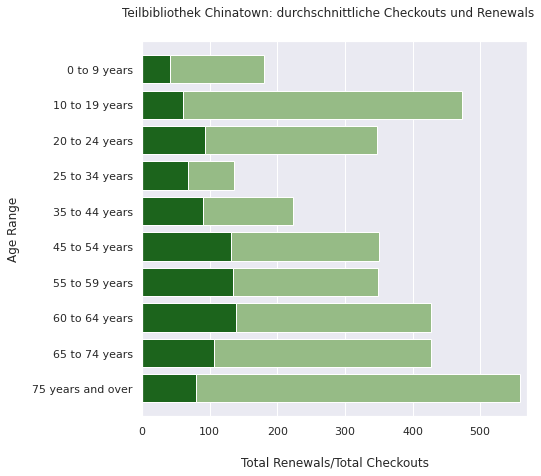

In [194]:
sns.barplot(y=chinatown_mean.index, x = chinatown_mean["Total Checkouts"], color="#93c47d")
sns.barplot(y=chinatown_mean.index, x = chinatown_mean["Total Renewals"], color="#107010")
#sns.set({'figure.figsize':(6.9,6.9)})
#plt.figure(figsize=(6.9,6.9))
plt.margins(x=0.02, y=0.04) 
plt.suptitle('Teilbibliothek Chinatown: durchschnittliche Checkouts und Renewals', y=0.95, size=12)
plt.xlabel("Total Renewals/Total Checkouts",labelpad=20)
plt.ylabel("Age Range", labelpad=12, size=12)
plt.show()

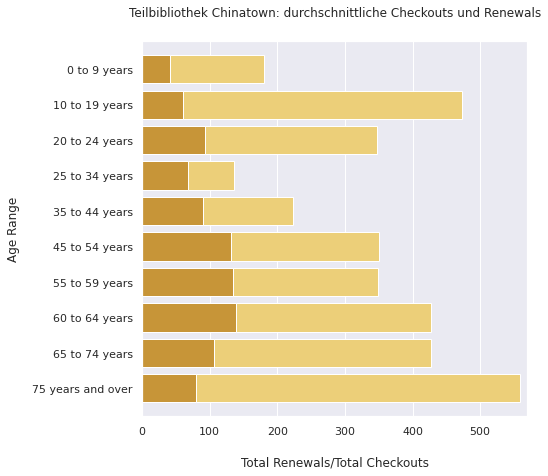

In [191]:
sns.barplot(y=chinatown_mean.index, x = chinatown_mean["Total Checkouts"], color="#FFD966")
sns.barplot(y=chinatown_mean.index, x = chinatown_mean["Total Renewals"], color="#df9c20")
#sns.set({'figure.figsize':(6.9,6.9)})
#plt.figure(figsize=(6.9,6.9))
plt.margins(x=0.02, y=0.04) 
plt.title('Teilbibliothek Chinatown: durchschnittliche Checkouts und Renewals', y=1.05)
plt.xlabel("Total Renewals/Total Checkouts",labelpad=20)
plt.ylabel("Age Range", labelpad=12, size=12)
plt.show()

Die Visualisierungen der Balkendiagramme, die ich für diese Darstellung gerne auswählen wollte, sind mir mit seaborn nicht so gut gelungen. Die Darstellunng mit pandas fand ich ansprechender in Farbe und der Nebeneinanderstellung der Balken (vielleicht ist dies auch mit seaborn möglich, mit allen Informationen, die ich gefunden habe, ist es mir leider nicht gelungen). Daher habe ich sie hier noch einmal angefügt. Die Balkendiagramme geben visuell klar die Größenunterschiede zwischen den Variablen "Total Checkouts" und "Total Renewals" wieder. Und die Durchschnittszahlen bestätigen die Tendenz, die schon oben bei der Korrelation zwischen den beiden Variablen erkannt werden konnte: der Zusammenhang zwischen "Total Checkouts" und "Total Renewals" ist in der Teilbibliothek "Sunset" etwas höher als in "Chinatown".
<br/><br/>

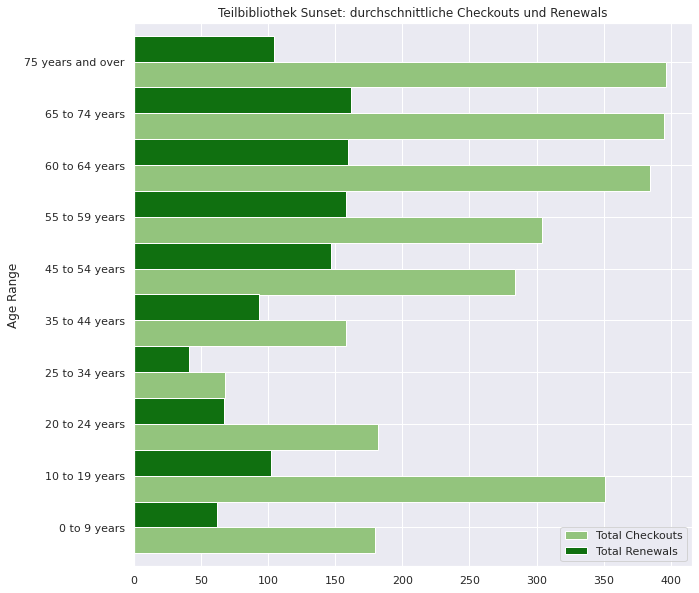

In [99]:
sunset_mean.plot(use_index=True, y=["Total Checkouts", "Total Renewals"], 
               kind="barh", figsize=(10,10), color=[("#93c47d"), ("#107010")], 
               title="Teilbibliothek Sunset: durchschnittliche Checkouts und Renewals", width=1.0)
plt.show()

<br/>

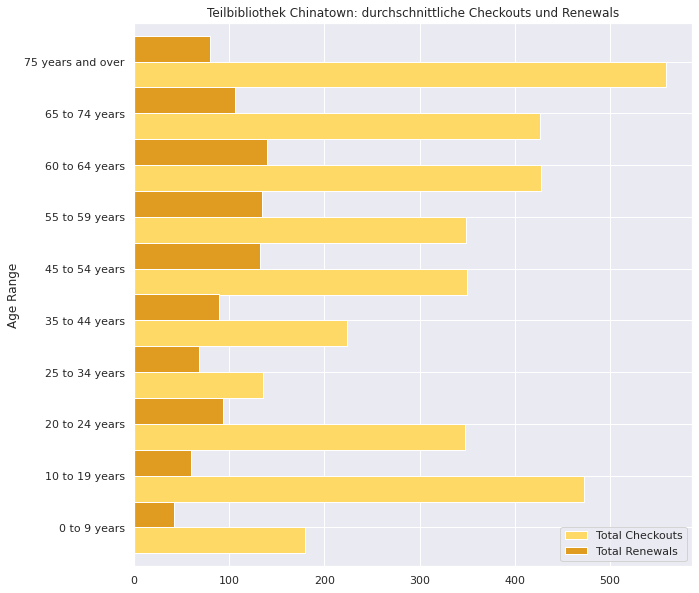

In [100]:
chinatown_mean.plot(use_index=True, y=["Total Checkouts", "Total Renewals"], 
               kind="barh", figsize=(10,10), color=[("#FFD966"), ("#df9c20")], 
                title="Teilbibliothek Chinatown: durchschnittliche Checkouts und Renewals", width=1)
plt.show()

Für die Visualisierungen habe ich für diese Darstellung Balkendiagramme gewählt, sie geben visuell klar die Größenunterschiede zwischen den Variablen "Total Checkouts" und "Total Renewals" wieder. Und die Durchschnittszahlen bestätigen die Tendenz, die schon oben bei der Korrelation zwischen den beiden Variablen erkannt werden konnte: der Zusammenhang zwischen "Total Checkouts" und "Total Renewals" ist in der Teilbibliothek "Sunset" etwas höher als in "Chinatown".